# Wear resistance vs friction coefficient

## Imports

In [7]:
%matplotlib inline
import matplotlib.pyplot as pyplot
import numpy as np

## Data

In [8]:
hardness_hydrophi = [ 0.82, 1.05, 0.88, 0.91, 0.84]

hardness_hydropho = [ 0.82, 0.82, 0.81, 0.85, 0.85, 0.86, 1.13, 1.03]

modulus_hydrophi = [13.31, 16.23, 13.64, 14.02, 13.49]

modulus_hydropho = [13.31, 12.73, 12.42, 12.36, 13.31, 13.04, 15.98, 14.75]

fric_coeff_hydrophi = [{'mean': 0.5468975720127744, 'std_error': 0.031389895972935566}, {'mean': 0.4651803121611392, 'std_error': 0.020998122724161065}, {'mean': 0.42771368474709054, 'std_error': 0.03200115617970499}, {'mean': 0.4687781997598212, 'std_error': 0.03310088565717944}, {'mean': 0.4841371072347879, 'std_error': 0.02246443343235378}]

fric_coeff_hydropho = [{'mean': 0.5547956600395709, 'std_error': 0.02957307958336986}, {'mean': 0.44524308580239946, 'std_error': 0.04220767324699555}, {'mean': 0.41494667262289886, 'std_error': 0.01849113808735049}, {'mean': 0.4117096667219771, 'std_error': 0.029441973977993353}, {'mean': 0.39065713680313496, 'std_error': 0.02306699192050132}, {'mean': 0.3628580296634133, 'std_error': 0.03478953915578078}, {'mean': 0.3610128257065488, 'std_error': 0.04201788503650071}, {'mean': 0.36018653445907367, 'std_error': 0.03478355595825389}]

scratch_depth_hydrophi = [{'mean': 180.72690372311519, 'std_error': 26.684357198834647}, {'mean': 148.38899980561877, 'std_error': 19.232222042637762}, {'mean': 152.90493048157896, 'std_error': 25.776801290932916}, {'mean': 161.52068885263157, 'std_error': 10.064323434538164}, {'mean': 162.72713923456615, 'std_error': 16.404061331790043}]

scratch_depth_hydropho = [{'mean': 178.89769868942625, 'std_error': 28.08049710292002}, {'mean': 162.05421878289474, 'std_error': 8.949514238377844}, {'mean': 156.47203362402206, 'std_error': 4.655681330559932}, {'mean': 147.55026508270677, 'std_error': 7.80024868396948}, {'mean': 144.3913810855263, 'std_error': 6.753769964263858}, {'mean': 129.74873529934214, 'std_error': 23.226254442398535}, {'mean': 127.01454508881577, 'std_error': 12.644901782981254}, {'mean': 132.14498480432076, 'std_error': 11.792650799031003}]

sample_mean_wear_rates_from_max = [(0.16919973317731132, 0.007041317309379722), (0.22480956893519008, 0.008287254279501857), (0.22967367237073957, 0.023050970632866756), (0.24373145115466585, 0.035096620018019005), (0.20472499144150139, 0.04183477366321152), (0.2575931468210573, 0.01689005952762705), (0.10605869783469399, 0.013946076009022444), (0.14133984303461833, 0.009932984958675188), (0.16150995303363166, 0.012818237387824536), (0.12341456454455652, 0.007079024742335945), (0.09735464002523958, 0.0031058356569035094), (0.2562616971944627, 0.008708658975952237)]

# sample_mean_depth_from_max = [(1435.3072591689568, 189.11783288172424), (579.0311942695827, 132.63452897162884), (1239.6560246255126, 119.26750257010285), (1398.6306123555025, 242.16819902351097), (911.4499231385558, 201.4522725438842), (2004.2422266674432, 310.9086617403364), (647.7755128893467, 145.03977222517648), (1175.340139327164, 80.64203957218274), (607.6654094450856, 106.5511263189047), (455.6319833245585, 48.626376633251596), (493.9908772882788, 170.55720527186816), (978.8540132815718, 162.37208060763433)]

sample_mean_area_from_max = [(6.649927835390631, 0.7736407678673781),
 (6.33821892564672, 0.5398699541784929),
 (8.487505780538296, 0.9223251672829178),
 (10.171867594889369, 2.0845772975739303),
 (6.377510900537735, 1.6567829168033688),
 (12.645380750757715, 3.8901358415176333),
 (2.6505991422137223, 0.17075818142534935),
 (4.0563629575544855, 0.37803127790217633),
 (4.421839781075115, 0.4168510606933933),
 (2.7612743915870253, 0.22531791806437568),
 (2.655579650995011, 0.4376229766826669),
 (9.109576181044465, 0.849616271279907)]

other_columns = ["H/E",	"H^3/E^2",	"Plasticity index"]
hydrophi_other = [[0.061607814,	0.003112329,	0.543960661],
[0.064695009,	0.004394716,	0.574725058],
[0.064516129,	0.003662851,	0.542429809],
[0.064907275,	0.003833788,	0.544191602],
[0.062268347,	0.003256972,	0.556669834]]

hydropho_other = [[0.061607814,	0.003112329,	0.543960661],
[0.064414768,	0.003402395,	0.530652826],
[0.065217391,	0.00344518,	    0.530848047],
[0.068770227,	0.004019942,	0.504100834],
[0.063861758,	0.003466576,	0.538538217],
[0.06595092,	0.003740591,	0.524002573],
[0.070713392,	0.005650434,	0.516034371],
[0.069830508,	0.005022589,	0.52098823]]

fric_coeff_hydrophi = [d['mean'] for d in fric_coeff_hydrophi]
fric_coeff_hydropho = [d['mean'] for d in fric_coeff_hydropho]
scratch_depth_hydrophi = [d['mean'] for d in scratch_depth_hydrophi]
scratch_depth_hydropho = [d['mean'] for d in scratch_depth_hydropho]
wear_rate_hydrophi = [t[0] for t in sample_mean_wear_rates_from_max[0:5]]
wear_rate_hydropho = [t[0] for t in [sample_mean_wear_rates_from_max[0]] + sample_mean_wear_rates_from_max[5:]]
wear_area_max_hydrophi = [t[0] for t in [sample_mean_area_from_max[-1]] +sample_mean_area_from_max[0:4]]
wear_area_max_hydropho = [t[0] for t in [sample_mean_area_from_max[-1]] + sample_mean_area_from_max[4:-1]]
plast_idx_hydrophi = [row[other_columns.index("Plasticity index")] for row in hydrophi_other]
plast_idx_hydropho = [row[other_columns.index("Plasticity index")] for row in hydropho_other]
h_by_e_hydrophi = [row[other_columns.index("H/E")] for row in hydrophi_other]
h_by_e_hydropho = [row[other_columns.index("H/E")] for row in hydropho_other]
h3_by_e2_hydrophi = [row[other_columns.index("H^3/E^2")] for row in hydrophi_other]
h3_by_e2_hydropho = [row[other_columns.index("H^3/E^2")] for row in hydropho_other]

all_results = {}
all_results["hardness"] = hardness_hydrophi + hardness_hydropho
all_results["modulus"] = modulus_hydrophi + modulus_hydropho
all_results["fric_coeff"] = fric_coeff_hydrophi + fric_coeff_hydropho
all_results["plast_idx"] = plast_idx_hydrophi + plast_idx_hydropho
all_results["h_by_e"] = h_by_e_hydrophi + h_by_e_hydropho
all_results["h3_by_e2"] = h3_by_e2_hydrophi + h3_by_e2_hydropho
all_results["scratch_depth"] = scratch_depth_hydrophi + scratch_depth_hydropho
all_results["wear_rate"] = wear_rate_hydrophi + wear_rate_hydropho
all_results["wear_area_max"] = wear_area_max_hydrophi + wear_area_max_hydropho

#row_labels = ["scratch_depth", "wear_rate", "wear_depth_max"]
row_labels = ["scratch_depth", "wear_area_max"]
col_labels = ["hardness", "modulus", "fric_coeff", "plast_idx", "h_by_e", "h3_by_e2", "scratch_depth",  "wear_area_max"]

#print(wear_area_max_hydropho)
#print(wear_area_max_hydrophi)

## Correlation coefficient

In [9]:
def calc_corr_coeff(data1, data2):
    return np.corrcoef(np.array(data1), np.array(data2))[1, 0]

print(col_labels)
print("\n")
corr_table = np.zeros((len(row_labels), len(col_labels)), dtype=float)
for row_idx, row in enumerate(row_labels):
    for col_idx, col in enumerate(col_labels):
        corr_table[row_idx, col_idx] = calc_corr_coeff(all_results[row], all_results[col])
        print(corr_table[row_idx, col_idx], end="\t")
    print("\n")

#print(corr_table)


['hardness', 'modulus', 'fric_coeff', 'plast_idx', 'h_by_e', 'h3_by_e2', 'scratch_depth', 'wear_area_max']


-0.638357166596223	-0.39907563194969903	0.94582549314836	0.4598258819731425	-0.8255951800429099	-0.7708526890097459	0.9999999999999998	0.7353333809416299	

-0.5241996830172829	-0.3107253604330932	0.6595649550693082	0.5435209164485126	-0.7158405421658626	-0.6550865543401432	0.73533338094163	1.0	



## Plots

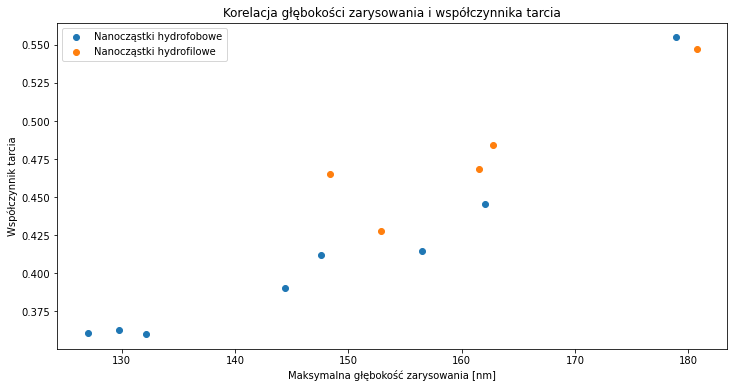

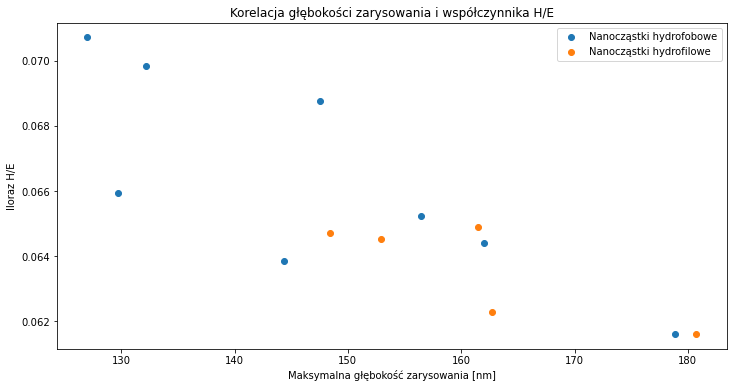

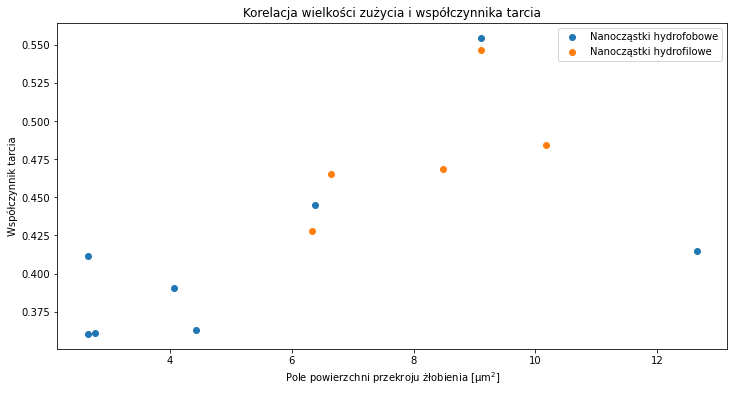

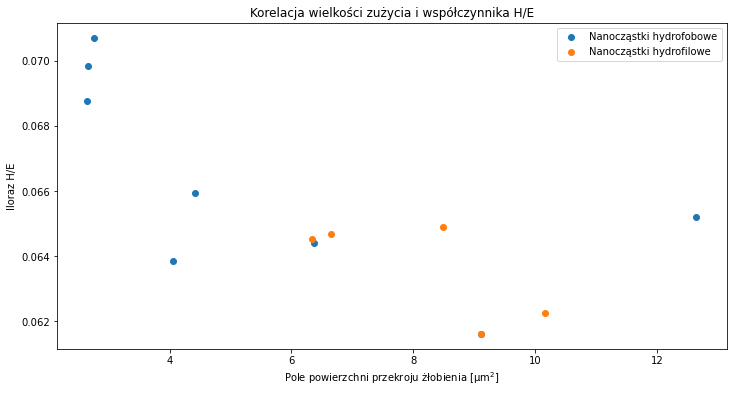

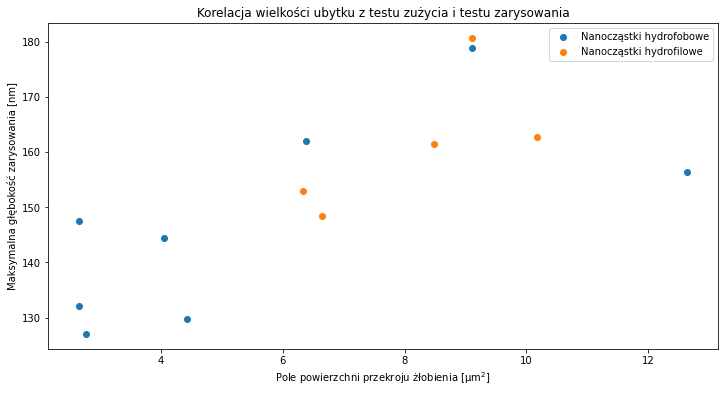

In [10]:
FS = (12,6)

# scratch / fric coeff
fig_corr = pyplot.figure(figsize = FS)
ax = fig_corr.add_subplot(111)
ax.scatter(scratch_depth_hydropho, fric_coeff_hydropho, label="Nanocząstki hydrofobowe")
ax.scatter(scratch_depth_hydrophi, fric_coeff_hydrophi, label="Nanocząstki hydrofilowe")
ax.set_title("Korelacja głębokości zarysowania i współczynnika tarcia")
ax.set_ylabel("Współczynnik tarcia")
ax.set_xlabel("Maksymalna głębokość zarysowania [nm]")
ax.legend()

# scratch / h/e
fig_corr = pyplot.figure(figsize = FS)
ax = fig_corr.add_subplot(111)
ax.scatter(scratch_depth_hydropho, h_by_e_hydropho, label="Nanocząstki hydrofobowe")
ax.scatter(scratch_depth_hydrophi, h_by_e_hydrophi, label="Nanocząstki hydrofilowe")
ax.set_title("Korelacja głębokości zarysowania i współczynnika H/E")
ax.set_ylabel("Iloraz H/E")
ax.set_xlabel("Maksymalna głębokość zarysowania [nm]")
ax.legend()


# wear / fric coeff
fig_corr = pyplot.figure(figsize = FS)
ax = fig_corr.add_subplot(111)
ax.scatter(wear_area_max_hydropho, fric_coeff_hydropho, label="Nanocząstki hydrofobowe")
ax.scatter(wear_area_max_hydrophi, fric_coeff_hydrophi, label="Nanocząstki hydrofilowe")
ax.set_title("Korelacja wielkości zużycia i współczynnika tarcia")
ax.set_ylabel("Współczynnik tarcia")
ax.set_xlabel("Pole powierzchni przekroju żłobienia [μm$^2$]")
ax.legend()

#wear / h/e
fig_corr = pyplot.figure(figsize = FS)
ax = fig_corr.add_subplot(111)
ax.scatter(wear_area_max_hydropho, h_by_e_hydropho, label="Nanocząstki hydrofobowe")
ax.scatter(wear_area_max_hydrophi, h_by_e_hydrophi, label="Nanocząstki hydrofilowe")
ax.set_title("Korelacja wielkości zużycia i współczynnika H/E")
ax.set_ylabel("Iloraz H/E")
ax.set_xlabel("Pole powierzchni przekroju żłobienia [μm$^2$]")
ax.legend()

#wear / scratch
fig_corr = pyplot.figure(figsize = FS)
ax = fig_corr.add_subplot(111)
ax.scatter(wear_area_max_hydropho, scratch_depth_hydropho, label="Nanocząstki hydrofobowe")
ax.scatter(wear_area_max_hydrophi, scratch_depth_hydrophi, label="Nanocząstki hydrofilowe")
ax.set_title("Korelacja wielkości ubytku z testu zużycia i testu zarysowania")
ax.set_ylabel("Maksymalna głębokość zarysowania [nm]")
ax.set_xlabel("Pole powierzchni przekroju żłobienia [μm$^2$]")
ax.legend()



## Prints

In [11]:
print(plast_idx_hydrophi)
print(plast_idx_hydropho)
print(h_by_e_hydrophi)
print(h_by_e_hydropho)
print(h3_by_e2_hydrophi)
print(h3_by_e2_hydropho)


[0.543960661, 0.574725058, 0.542429809, 0.544191602, 0.556669834]
[0.543960661, 0.530652826, 0.530848047, 0.504100834, 0.538538217, 0.524002573, 0.516034371, 0.52098823]
[0.061607814, 0.064695009, 0.064516129, 0.064907275, 0.062268347]
[0.061607814, 0.064414768, 0.065217391, 0.068770227, 0.063861758, 0.06595092, 0.070713392, 0.069830508]
[0.003112329, 0.004394716, 0.003662851, 0.003833788, 0.003256972]
[0.003112329, 0.003402395, 0.00344518, 0.004019942, 0.003466576, 0.003740591, 0.005650434, 0.005022589]
